In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [23]:
plt.rcParams["figure.figsize"] = (12, 10)

In [24]:
bikes = pd.read_csv('https://downloader.disk.yandex.ru/disk/bee53e999a8db73a874e552261b01d17cede8f08bcdaf0e86e107b4e59c29ce1/6172d663/lU4pm7267hvwXIgKxeWHlE8LSO1K-CA9eaJMqhea-yHoYndF8xU16K9KlxL8ATBlWhtV5MK100G4toKzAu2Ysg%3D%3D?uid=0&filename=london.csv&disposition=attachment&hash=1L4GL9C7mlTQtiaARFspjYlz3P941S8VyagOFvPvRiLbl/zoHhklfIVw/PfmW81oq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=125175473&fsize=1034821&hid=8a88e14e20b5107be2cf7131b2fb3e6d&media_type=spreadsheet&tknv=v2')

In [25]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


**Make sure the data types were read correctly. If necessary, cast the variables to the required types.**

In [26]:
bikes.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [27]:
bikes.timestamp = pd.to_datetime(bikes.timestamp)

**First, let's try to look at the number of trips by date and time. Plot a graph where:**
* x-axis - date (timestamp)
* y-axis - number of trips (cnt)

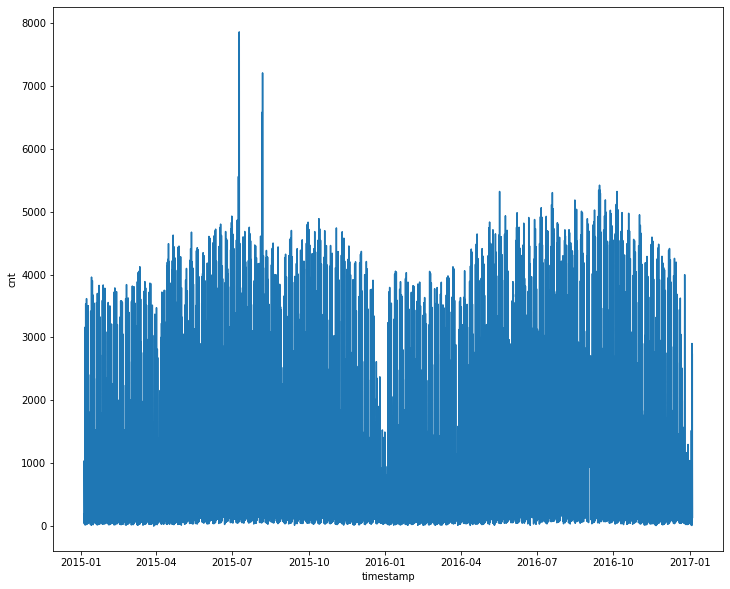

In [28]:
sns.lineplot(x=bikes.timestamp, y=bikes.cnt)

In [29]:
# It is very difficult to understand something, we need to transform the data to see trends

**Aggregate the number of trips by day and visualize the result**

In [30]:
bikes.sort_values(by='timestamp', inplace=True)
bikes.set_index('timestamp', inplace=True, drop=False)

In [31]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [32]:
aggreg = bikes.resample(rule='D').agg({'cnt': 'sum'})

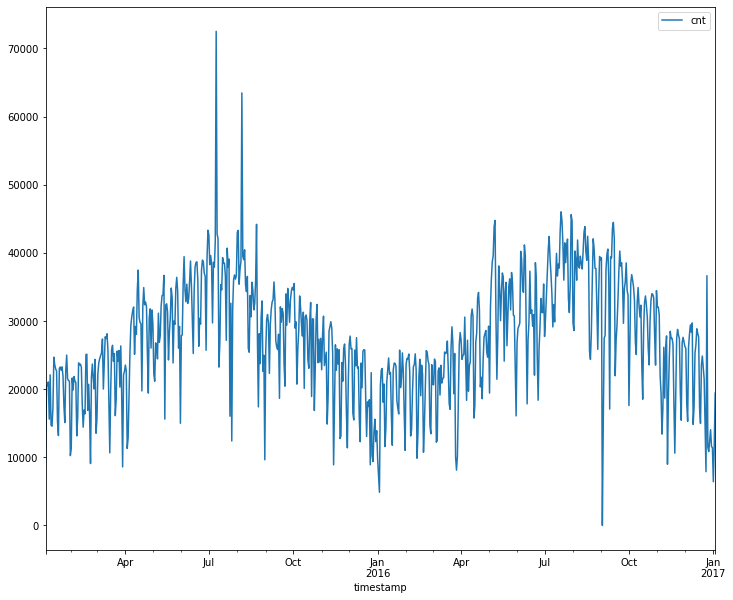

In [33]:
aggreg.plot()

**So, you have found some jumps in the graph. Let's check what could have happened that day 🤔.    
To do this, we will divide further actions into several stages:**

* first, let's calculate the rolling average to smooth the series
* further - the difference between the observed and smoothed values
* define the upper and lower bounds of the 99% confidence interval
* find the causes of the anomalies!    

**At this step, take the aggregated data by days from the previous step and calculate the moving average with window 3.     
As your answer, enter the received number of leases for 2015-07-09.**

In [34]:
aggreg.head()

,cnt
timestamp,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,21064
2015-01-08,15601


In [35]:
aggreg.cnt.rolling(3).mean().to_frame().reset_index().query('timestamp == "2015-07-09"')

,timestamp,cnt
186,2015-07-09,50705.0


**Now calculate the difference between the observed and calculated values.     
Next - use the function to calculate the standard deviation. For example:**    
$c = a - b$    
$std = np.std(c)$    
**For your answer, enter the resulting standard deviation, rounded to 2 decimal places.**

In [36]:
np.std(aggreg.cnt - aggreg.cnt.rolling(3).mean()).round(2)

4558.59

**Now let's define the boundaries of the intervals. To do this, you need to take the data obtained when calculating the moving average and create the following objects:**

* upper_bound - upper border; add $2.576 * std$ to the average
* lower_bound - lower bound; subtract $2.576 ∗ std$    

**Write the obtained values into new columns of the dataframe with the aggregated data.
What is the upper bound for the last observation?**

In [37]:
aggreg.cnt.rolling(3).mean()

timestamp
2015-01-04             NaN
2015-01-05             NaN
2015-01-06    16739.666667
2015-01-07    20683.000000
2015-01-08    19092.666667
                  ...     
2016-12-30    12682.000000
2016-12-31    12347.333333
2017-01-01     9803.666667
2017-01-02     9889.333333
2017-01-03    12560.000000
Freq: D, Name: cnt, Length: 731, dtype: float64

In [38]:
aggreg["upped_bound"] = aggreg.cnt.rolling(3).mean() + 2.576*np.std(aggreg.cnt - aggreg.cnt.rolling(3).mean())

In [39]:
aggreg["lower_bound"] = aggreg.cnt.rolling(3).mean() - 2.576*np.std(aggreg.cnt - aggreg.cnt.rolling(3).mean())

In [40]:
aggreg.head()

,cnt,upped_bound,lower_bound
timestamp,,,
2015-01-04,9234,NaN,NaN
2015-01-05,20372,NaN,NaN
2015-01-06,20613,28482.585854,4996.747479
2015-01-07,21064,32425.919188,8940.080812
2015-01-08,15601,30835.585854,7349.747479


**Finally, let's examine the abnormally high values!     
First, print the observations for which the observed values are greater than the upper bound of the 99% confidence interval.**

**On what day was the largest number of rentals?**

In [41]:
aggreg.query('cnt > upped_bound').sort_values('cnt', ascending=False).head(1)

,cnt,upped_bound,lower_bound
timestamp,,,
2015-07-09,72504,62447.919188,38962.080812


**Do the same for the days when the number of rentals was lower than expected.**

In [42]:
aggreg.query('cnt < lower_bound')

,cnt,upped_bound,lower_bound
timestamp,,,
2015-05-14,15609,40452.252521,16966.414146
2015-07-12,23240,47779.585854,24293.747479
2015-07-24,16034,42756.585854,19270.747479
2015-08-24,17400,41272.252521,17786.414146
2015-11-14,8898,32780.252521,9294.414146
2016-09-02,0,37829.252521,14343.414146
2016-09-10,17080,43004.919188,19519.080812
2016-09-16,21967,47936.252521,24450.414146
2016-11-12,8990,32620.919188,9135.080812
